# Analisi (NOAA)

## Introduzione

In questo notebook, userò `pandas` per esaminare i dati sui fulmini del 2018 raccolti dalla National Oceanic and Atmospheric Administration (NOAA).
Successivamente calcolerò il numero totale di fulmini per ogni mese e visualizzerò queste informazioni su un grafico a barre.

## Importazione di pacchetti e librerie

Prima di iniziare, importo tutte le librerie e le estensioni necessarie.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
# caricamento dataset
df = pd.read_csv('noaa_dataset_2018.csv')

In [4]:
# visualizzo le prime 10 righe
df.head(10)

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)
5,2018-01-03,119,POINT(-78 28)
6,2018-01-03,35,POINT(-79.3 28)
7,2018-01-03,60,POINT(-79.1 28)
8,2018-01-03,41,POINT(-78.7 28)
9,2018-01-03,119,POINT(-78.6 28)


- I dati sono organizzati in modo che ogni riga contenga il numero totale di fulmini registrati in un giorno specifico e in una determinata area geografica.

Un modo rapido per determinare quante righe e colonne di dati ci sono in totale è usare `df.shape`. Le informazioni verranno visualizzate come: ([righe], [colonne]).

In [5]:
df.shape

(3401012, 3)

- Il numero totale di righe è 3.401.012 e ci sono tre colonne.

In [6]:
# maggiori informazioni sui dati, inclusi i tipi di dati di ciascuna colonna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


- I tipi di dati mostrano che number_of_strikes è un numero intero, mentre le altre due colonne sono oggetti.

### Conversione della colonna date in formato datetime

Converto usando la funzione `to_datetime()`.

In [7]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])

### Calcolare i giorni con più fulmini

Per scoprire i giorni con più fulmini nel 2018, raggruppo i dati per data `(groupby())`, sommo il conteggio dei fulmini per ogni giorno e ordino i risultati in ordine decrescente `(sort_values())` per visualizzare i 10 giorni con il numero massimo di fulmini.

In [8]:
# Calcolare i giorni con più fulmini
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10) 

,number_of_strikes
date,
2018-08-29,1070457
2018-08-17,969774
2018-08-28,917199
2018-08-27,824589
2018-08-30,802170
2018-08-19,786225
2018-08-18,741180
2018-08-16,734475
2018-08-31,723624


### Estrazione dei dati del mese

Estraggo il mese dalla colonna `date`su una nuova colonna chiamata month, utilizzando la funzione `dt.month`.

In [9]:
# Creo una nuova colonna `month`
df['month'] = df['date'].dt.month
df.head()

,date,number_of_strikes,center_point_geom,month
0,2018-01-03,194,POINT(-75 27),1
1,2018-01-03,41,POINT(-78.4 29),1
2,2018-01-03,33,POINT(-73.9 27),1
3,2018-01-03,38,POINT(-73.8 27),1
4,2018-01-03,92,POINT(-79 28),1


### Calcolare il numero di fulmini al mese

Ora organizzo i dati usando `groupby()`, `sum()` e `sort_values()`.

In [9]:
# Calcolo il numero totale di fulmini per mese
df.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


### Conversione numero mese in testo

Per leggere i dati più facilmente, converto il numero del mese in testo utilizzando la funzione datetime `dt.month_name()` e aggiungendola come nuova colonna nel dataframe. `str.slice` ometterà il testo dopo le prime tre lettere.

In [10]:
# Creo una colonna month_txt
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan


### Creazione di un nuovo dataframe

L'obiettivo è rappresentare graficamente il numero totale di fulmini per mese tramite un grafico a barre. 

Per facilitare la rappresentazione grafica, creo un nuovo dataframe chiamato `df_by_month`. Questo mi permette di accedere facilmente al mese, al testo del mese e al numero totale di fulmini per ogni mese.

In [11]:
# Creazione di un nuovo dataframe per agevolare il grafico
df_by_month = df.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


### Costruzione di un grafico a barre

Ora creo un grafico a barre attraverso la funzione `plt.bar()` di Pyplot che accetta argomenti di posizione come `x` e `height`, che rappresentano i dati utilizzati rispettivamente per gli assi x e y.

L'asse x rappresenterà i mesi e l'asse y rappresenterà il conteggio degli strike.

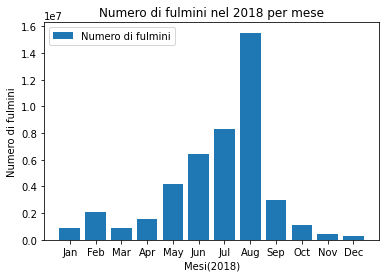

In [13]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Numero di fulmini")
plt.plot()

plt.xlabel("Mesi(2018)")
plt.ylabel("Numero di fulmini")
plt.title("Numero di fulmini nel 2018 per mese")
plt.legend()
plt.show()

### Conclusioni

- La maggiorparte dei fulmini sono caduti nei mesi estivi, in particolar modo nel mese di Agosto.
- Durante i mesi invernali cadono il minor numero di fulmini